<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 08-3 de Data Science

# Density-Based (Cluster Não Hierárquico)


## Objetivos

Após completar essa aula você será capaz de :

*   Criar um modelo usando o algoritmo DBSCAN
*   Entender a diferença entre os algoritmos K-means e DBSCAN


## Bibliotecas

In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

## Obtendo Dados

**Dry Bean Dataset Data Set**

* Sete tipos diferentes de feijão seco foram utilizados para montar o dataset,
* Levando em conta as características como forma, forma, tipo e estrutura pela situação do mercado. 
* Um sistema de visão computadorizado foi desenvolvido para distinguir sete diferentes variedades registradas de feijão seco com características similares, a fim de obter uma classificação uniforme de sementes. 
* Para o modelo de classificação, imagens de 13.611 grãos de 7 feijões secos registrados diferentes foram tiradas com uma câmera de alta resolução. 
* As imagens de feijão obtidas por sistema de visão computadorizado foram submetidas a segmentação e etapas de extração de características, e um total de 16 características; 12 dimensões e 4 formas de forma, foram obtidas dos grãos.

| Indice | Variável | Descrição|
| ----| ---- | ----|
|1| Area  (A)| A área de uma zona de feijão e o número de pixels dentro de seus limites. |
|2| Perimeter  (P)| A circunferência do feijão é definida como o comprimento de sua borda.| 
|3| Major axis length (L)| A distância entre as extremidades da linha mais longa que pode ser traçada de um feijão. |
|4| Minor axis length (l)| A linha mais longa que pode ser traçada do feijão enquanto está perpendicular ao eixo principal.|
|5| Aspect ratio (K)| Define a relação entre L e l.|
|6| Eccentricity (Ec)| Excentricidade da elipse tendo os mesmos momentos que a região.|
|7| Convex area (C)| Número de pixels no menor polígono convexo que pode conter a área de uma semente de feijão.|
|8| Equivalent diameter (Ed)| O diâmetro de um círculo tendo a mesma área que a área de uma semente de feijão.|
|9| Extent (Ex)| A relação entre os pixels na caixa delimitadora e a área do feijão.|
|10|Solidity (S)| Também conhecida como convexidade. A razão entre os pixels na casca convexa e aqueles encontrados no feijão.|
|11|Roundness (R)| Calculada com a seguinte fórmula: (4piA)/(P^2)|
|12|Compactness (CO)| Mede a redondeza de um objeto: Ed/L|
|13|ShapeFactor1 (SF1)|
|14|ShapeFactor2 (SF2)|
|15|ShapeFactor3 (SF3)|
|16|ShapeFactor4 (SF4)|
|17|Class |(Seker, Barbunya, Bombaim, Cali, Dermosan, Horoz e Sira)|


In [2]:
caminho = '../Data/Dry_Bean_Dataset.csv'
df_bean = pd.read_csv(caminho)
df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


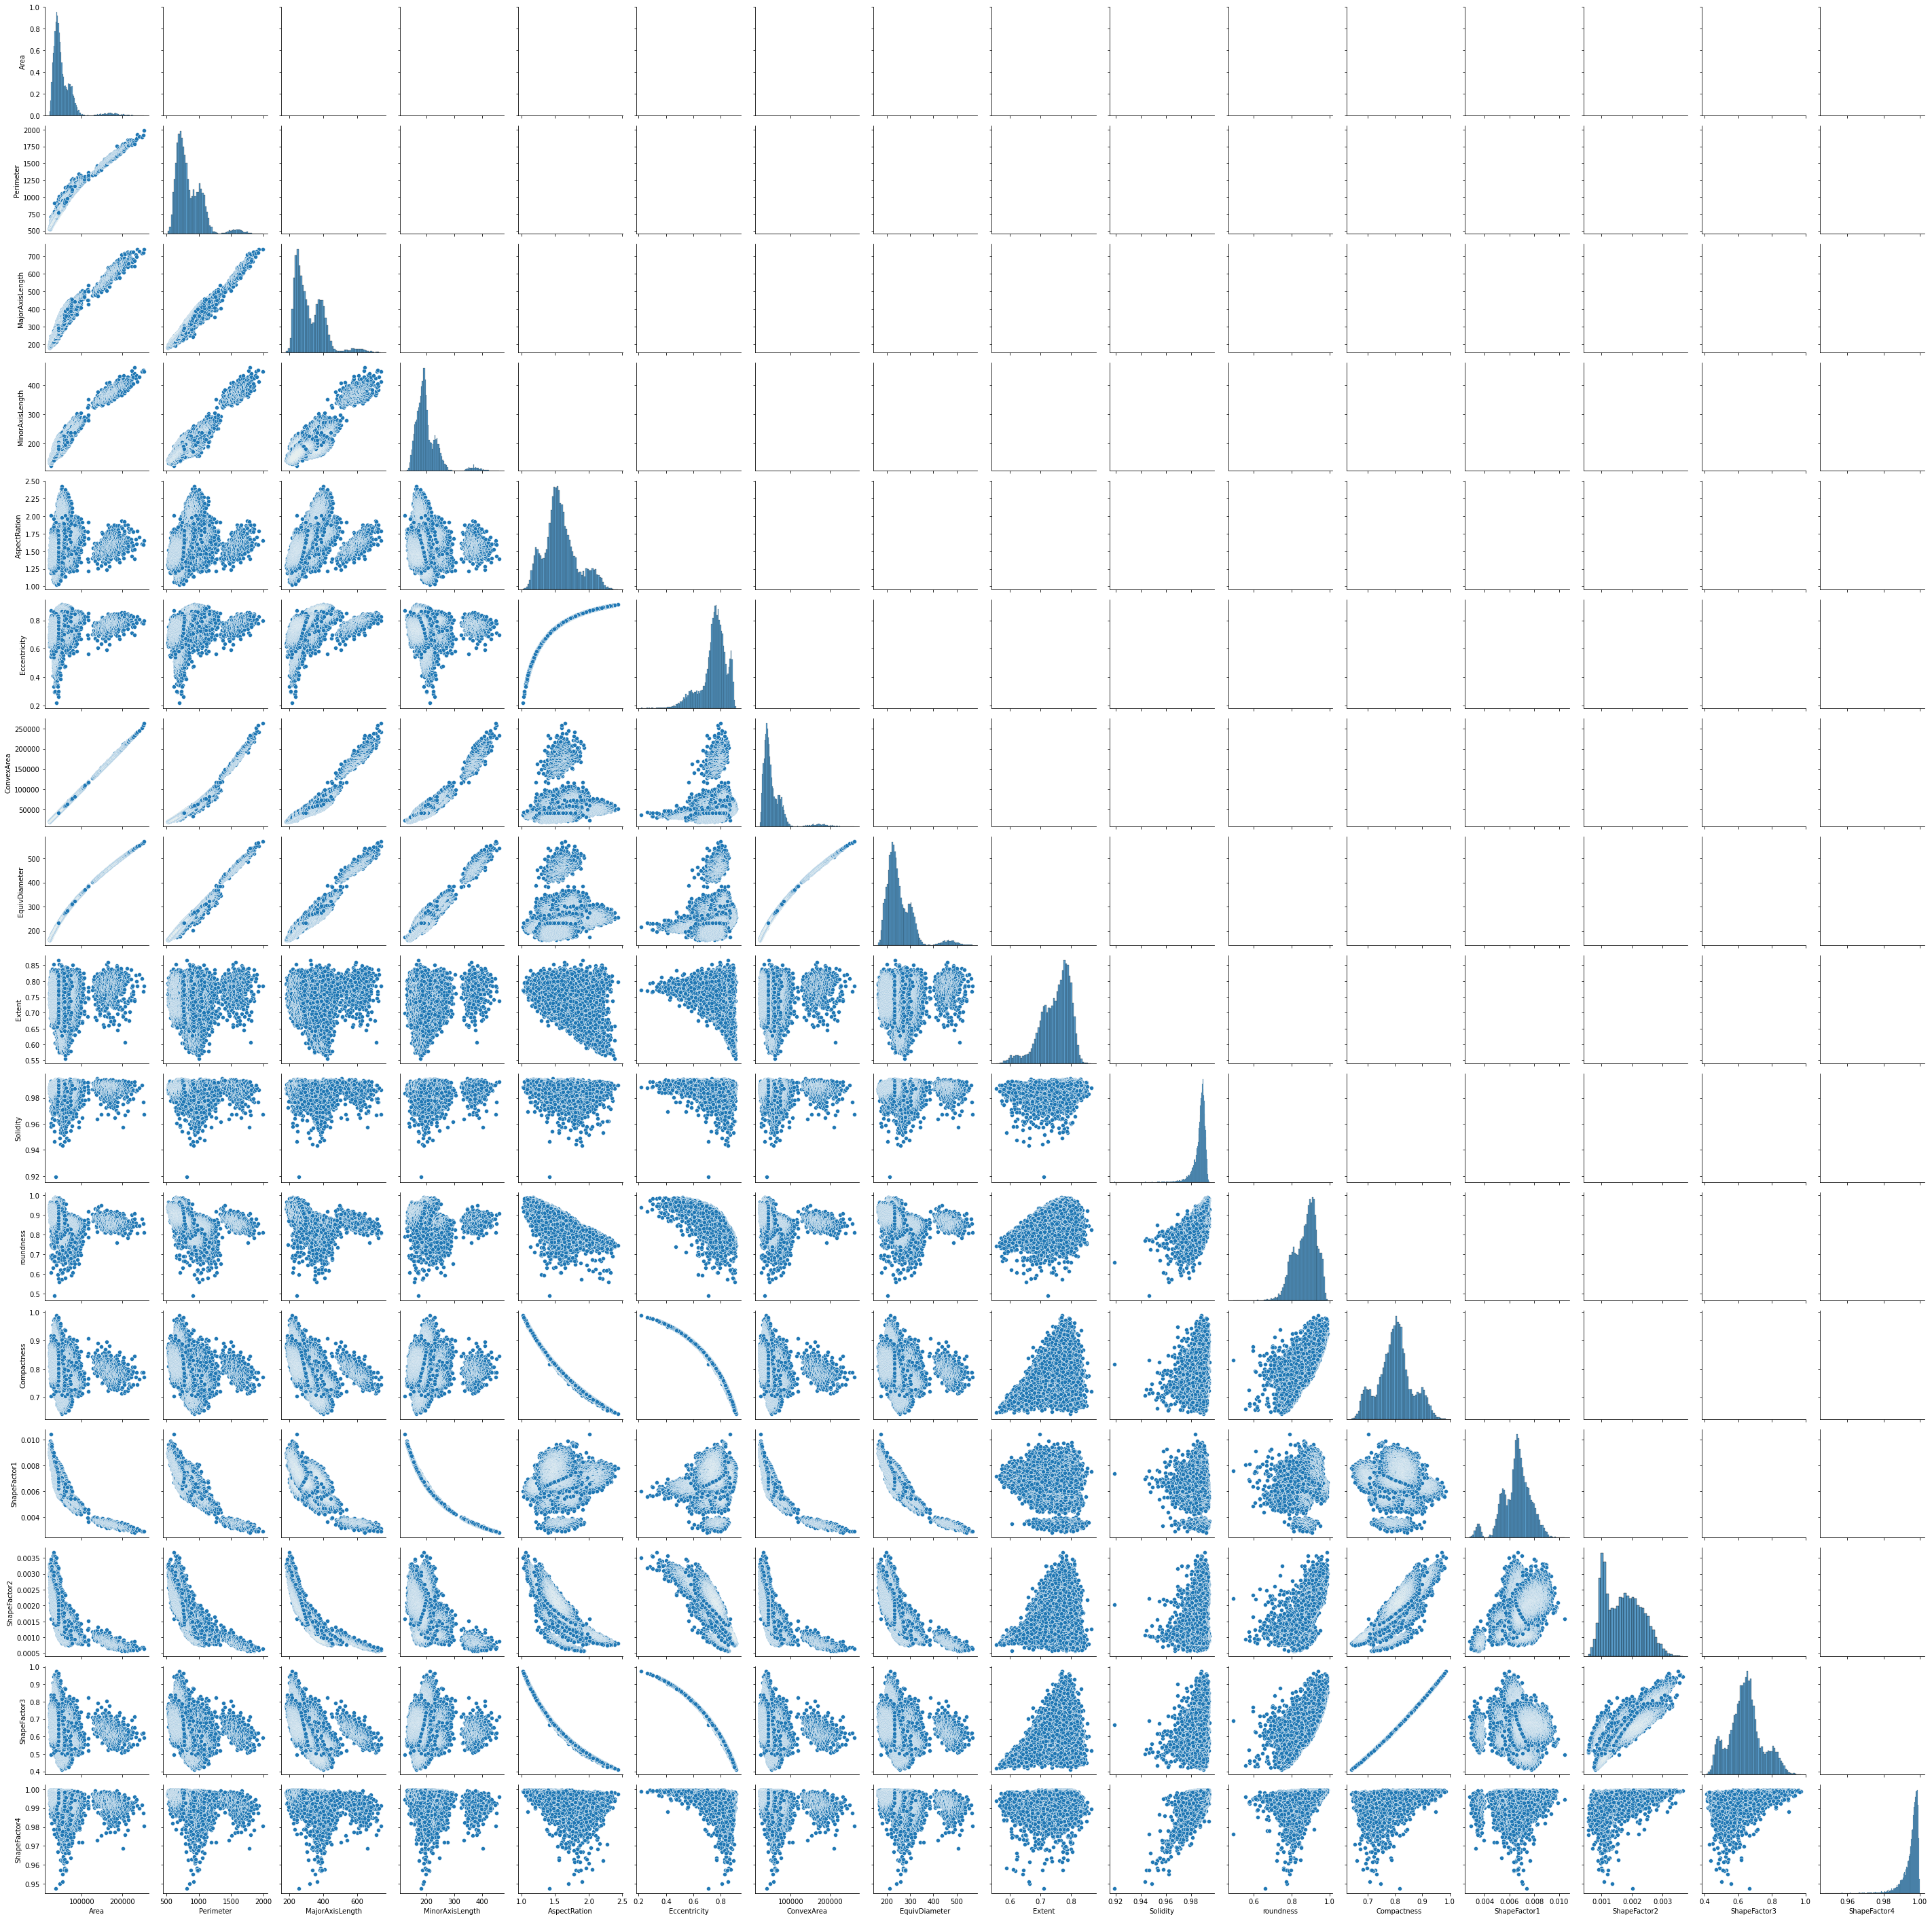

In [3]:
df_pairplot= df_bean.drop(labels='Class',axis='columns').copy(deep=True)

g = sns.PairGrid(df_pairplot,diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)


## K-Means

* Usaremos as variáveis `Compactness` e `ShapeFactor2`
* A intenção é criar clusters

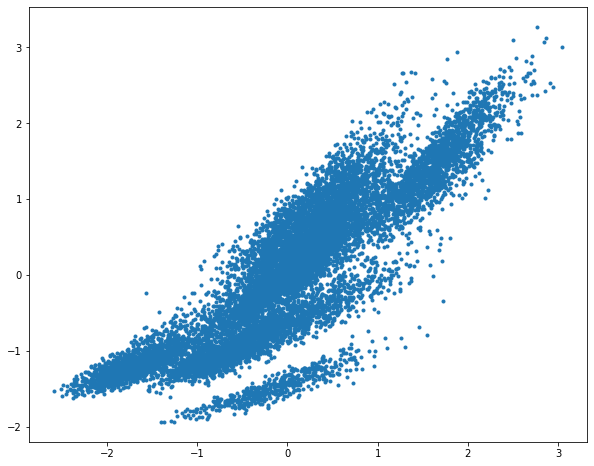

In [4]:
X = StandardScaler().fit_transform(df_bean[['Compactness','ShapeFactor2']])
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='.')

[1 1 1 ... 0 0 0]


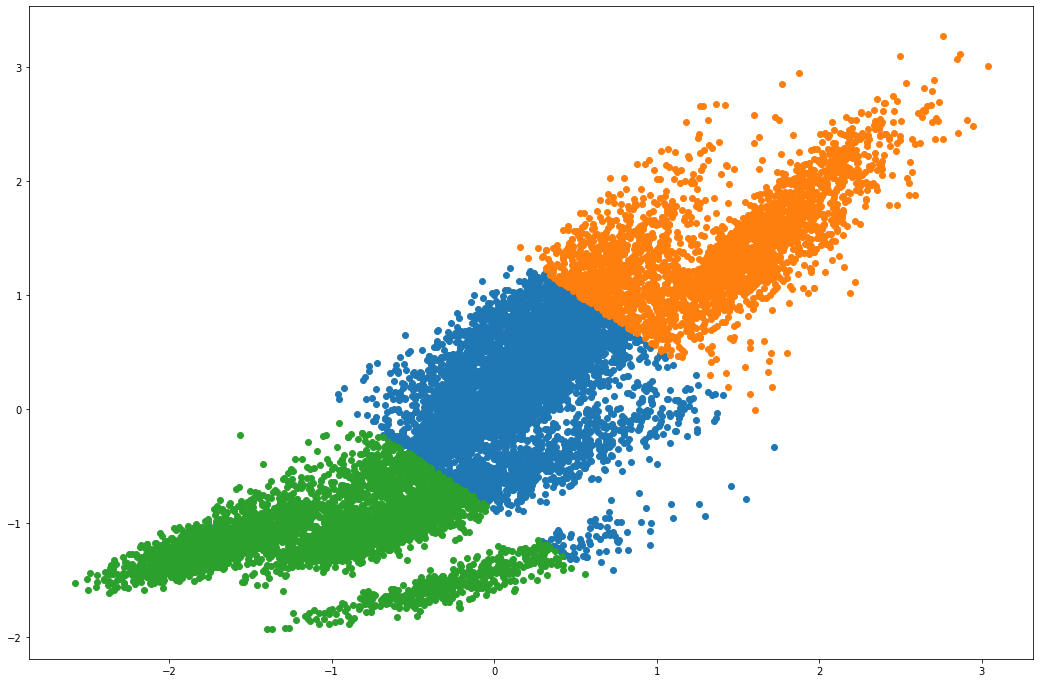

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 30)
k_means.fit(X)
print(k_means.labels_)
plt.figure(figsize=(18, 12))
for i in range(k_means.n_clusters):
    plt.scatter(X[k_means.labels_ == i , 0] , X[k_means.labels_ == i , 1] , label = i)

## DBSCAN


Nós Usaremos 2 parâmetros para o DBSCAN:

* Epsilon - Medida do Raio
* minimumSamples - quantos Vizinhos por raio

In [6]:
epsilon = 0.1
minimumSamples =6

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

labels = db.labels_
df = pd.DataFrame(labels)
UniqueLabels = df[0].unique()

UniqueLabels

array([-1,  0,  1,  2,  3,  4], dtype=int64)

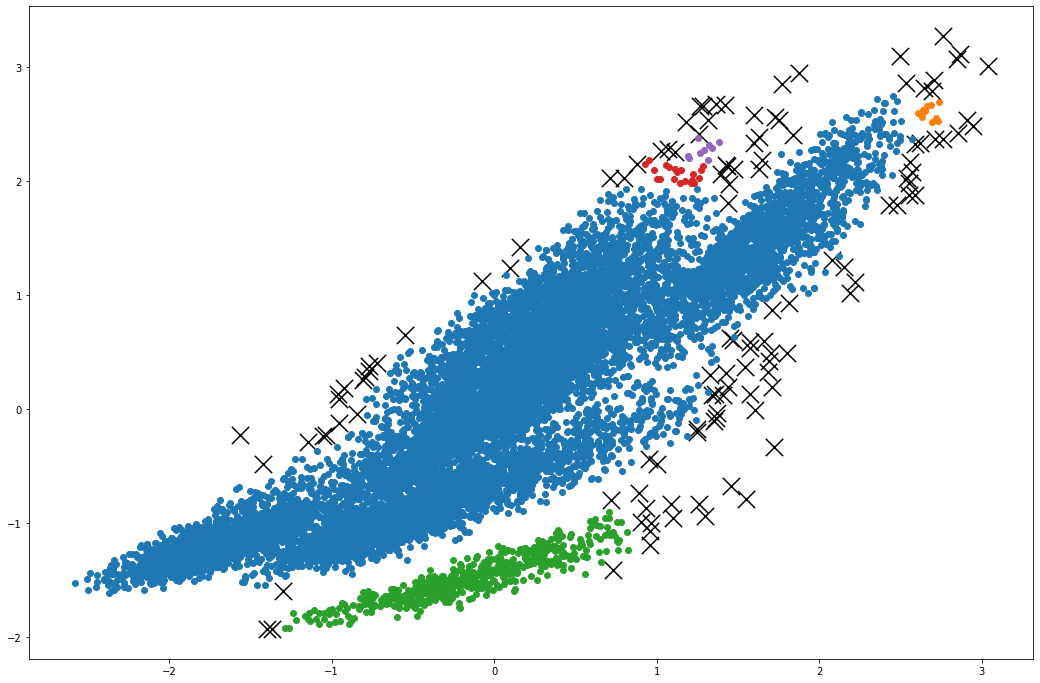

In [7]:
plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    if i != -1:
        plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i)
    else: # Print OUTLIERS
        plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, marker="x", s=300, color = 'k')

In [8]:
df_bean['cluster']=labels
df_bean.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,cluster
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,-1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,-1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,-1
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER,0
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER,0
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER,0
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER,0
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER,0


In [9]:
df_bean[df_bean['cluster']==0].describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,cluster
count,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944,12944.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3470,NaN
mean,48348.015065,827.379624,309.974045,195.437636,1.586355,0.751975,49005.046972,244.769544,0.748502,0.987157,0.873251,0.799202,0.006684,0.001741,0.642557,0.995169,NaN,0.0
std,16371.412931,157.531677,66.273978,28.855519,0.248893,0.090835,16689.583907,40.578348,0.049272,0.004649,0.060372,0.061917,0.000944,0.000572,0.099107,0.004327,NaN,0.0
min,21479.000000,538.454000,196.537280,133.933207,1.086315,0.390640,21762.000000,165.372042,0.555315,0.919246,0.489618,0.640577,0.004328,0.000751,0.410339,0.947687,NaN,0.0
25%,36129.000000,701.773500,252.514624,175.213869,1.432810,0.716167,36532.250000,214.478138,0.717020,0.985719,0.830035,0.761262,0.006057,0.001198,0.579520,0.993914,NaN,0.0
50%,43966.000000,787.590500,293.544917,191.353851,1.551106,0.764435,44534.500000,236.599344,0.758430,0.988293,0.884449,0.801342,0.006681,0.001721,0.642149,0.996472,NaN,0.0
75%,58261.000000,954.309000,369.939934,210.942172,1.712387,0.811768,59193.750000,272.360440,0.786077,0.990005,0.917483,0.834105,0.007297,0.002183,0.695732,0.997915,NaN,0.0


In [10]:
df_bean[df_bean['cluster']==1].describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,cluster
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10,10.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEKER,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
mean,36705.900000,696.73520,223.988695,208.930934,1.072132,0.360267,37128.800000,216.163875,0.784945,0.988623,0.950384,0.965051,0.006105,0.003266,0.931331,0.998481,NaN,1.0
std,1053.964942,13.88736,2.845887,3.355454,0.006059,0.013528,1080.833608,3.088053,0.013323,0.002324,0.020687,0.002739,0.000098,0.000036,0.005286,0.000935,NaN,0.0
min,35764.000000,674.47700,221.319945,205.098364,1.064698,0.343278,36032.000000,213.391985,0.764088,0.983969,0.909927,0.960693,0.005941,0.003214,0.922931,0.996340,NaN,1.0
25%,35976.750000,688.69300,221.875110,206.840918,1.067400,0.349706,36476.250000,214.025744,0.776373,0.987416,0.943558,0.963062,0.006023,0.003239,0.927488,0.998180,NaN,1.0
50%,36200.500000,691.09400,222.437193,207.608314,1.071577,0.359315,36601.000000,214.690196,0.783476,0.988783,0.949089,0.965030,0.006144,0.003270,0.931283,0.998805,NaN,1.0
75%,37570.500000,711.06625,226.351710,211.666951,1.075570,0.368216,38018.500000,218.708968,0.790751,0.989512,0.955833,0.967240,0.006174,0.003294,0.935554,0.999066,NaN,1.0


## Agrupando com base em todas variáveis numéricas

In [11]:
Z = df_bean.drop(labels=['cluster','Class'] , axis='columns').copy(deep=True)
Z = StandardScaler().fit_transform(Z)

epsilon = 0.5
minimumSamples =10

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Z)

labels = db.labels_
df = pd.DataFrame(labels)
UniqueLabels = df[0].unique()
df_bean['cluster']=labels


* Analisando a média de cada cluster

In [12]:
n_clusters = len(UniqueLabels)-1
df_medias = df_bean[df_bean['cluster']==0].mean().to_frame()

for i in range(1,n_clusters):
    df_medias[str(i)] = df_bean[df_bean['cluster']==i].mean().to_frame()
df_medias

C:\Users\User\AppData\Local\Temp\ipykernel_9404\2444092979.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_medias = df_bean[df_bean['cluster']==0].mean().to_frame()
C:\Users\User\AppData\Local\Temp\ipykernel_9404\2444092979.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_medias[str(i)] = df_bean[df_bean['cluster']==i].mean().to_frame()


,0,1,2,3,4,5,6,7,8,9,10
Area,38037.592252,74706.285714,78784.837838,47777.214286,50574.938776,52933.600000,54518.777778,53668.100000,54051.000000,60271.818182,39498.800000
Perimeter,719.115475,1043.404619,1076.172324,864.956571,890.514143,905.482100,921.227444,923.400700,917.862667,978.059273,757.556800
MajorAxisLength,262.891149,405.896481,423.342883,357.836942,364.063963,366.455578,381.066836,384.437045,368.408117,405.037447,291.259362
MinorAxisLength,183.875856,236.583692,238.180800,170.546616,177.651862,184.668433,182.669175,178.459753,187.517678,190.527211,173.084886
AspectRation,1.435762,1.715786,1.777495,2.098120,2.050242,1.984578,2.086300,2.154360,1.964857,2.126073,1.682706
Eccentricity,0.701499,0.812390,0.826574,0.879065,0.872675,0.863691,0.877587,0.885697,0.860692,0.882454,0.804146
ConvexArea,38437.042912,75724.333333,79504.837838,48327.571429,51195.959184,53577.800000,55081.666667,54326.100000,54757.000000,60920.363636,39981.400000
EquivDiameter,219.285591,308.399110,316.674939,246.617768,253.712275,259.603465,263.459341,261.390300,262.325297,276.989133,224.228332
Extent,0.759763,0.790486,0.795372,0.780584,0.615464,0.813874,0.615135,0.804131,0.648079,0.800854,0.728265
Solidity,0.989559,0.986544,0.990964,0.988610,0.987870,0.987979,0.989780,0.987896,0.987105,0.989341,0.987923


[1] KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

[2] https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

[3] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[5] https://seaborn.pydata.org/tutorial/introduction

[6] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html